In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from model.create_dataset import esm_alphabet, convert  
from model.affinity_pred_model import AffinityPredictor
from model.utilities import get_model 
import random 
import torch 


/home/fashr003/anaconda3/envs/fbagpuenv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Antibody seqeunce and thermostability data 

In [2]:
df = pd.read_csv('data/thermostability_dataset.csv')

In [3]:
df

,Study,heavy,light,fitness
0,Hie_2022_C143,EVQLVESGGGLVQPGGSLRLSCAASGFSVSTKYMTWVRQAPGKGLE...,QSALTQPASVSGSPGQSITISCTGTSNDVGSYTLVSWYQQYPGKAP...,68.383333
1,Hie_2022_C143,EVQLVESGGGLVQPGGSLRLSCAASGFSVSTKYMTWVRQAPGKGLE...,QSALTQPASVSGSPGQSITISCTGTSNDVGSYNLVSWYQQYPGKAP...,70.576667
2,Hie_2022_S309,QVQLVQSGAEVKKPGASVKVSCKASGYPFTSYGISWVRQAPGQGLE...,EIVLTQSPGTLSLSPGERATLSCRASQTVSSTSLAWYQQKPGQAPR...,72.490000
3,Hie_2022_S309,QVQLVQSGAEVKKPGASVKVSCKASGYPFTSYGISWVRQAPGQGLE...,EIVLTQSPGTLSLSPGERATLSCRASQTVSSTSLAWYQQKPGQAPR...,74.883333
4,Hie_2022_S309,QVQLVQSGAEVKKPGASVKVSCKASGYPFTSYGISWVRQAPGQGLE...,EIVLTQSPGTLSLSPGERATLSCRASQTVSSTSLAWYQQKPGQAPR...,74.736667
5,Hie_2022_S309,QVQLVQSGAEVKKPGASVKVSCKASGYPFTSYGISWVRQAPGQGLE...,EIVLTQSPGTLSLSPGERATLSCRASQSVSSNSLAWYQQKPGQAPR...,73.233333
6,Hie_2022_S309,QVQLVQSGAEVKKPGASVKVSCKASGYPFTSYGISWVRQAPGQGLE...,EIVLTQSPGTLSLSPGERATLSCRASQSVSSTSLAWYQQKPGQAPR...,72.816667
7,Hie_2022_S309,QVQLVQSGAEVKKPGASVKVSCKASGYPFTSYGISWVRQAPGQGLE...,EIVLTQSPGTLSLSPGERATLSCRASQSVSSTSLAWYQQKPGQAPR...,72.280000
8,Hie_2022_S309,QVQLVQSGAEVKKPGASVKVSCKASGYPFTSYGISWVRQAPGQGLE...,EIVLTQSPGTLSLSPGERATLSCRASQSVSSTSLAWYQQKPGQAPR...,72.726667
9,Hie_2022_S309,QVQLVQSGAEVKKPGASVKVSCKASGYPFTSYGISWVRQAPGQGLE...,EIVLTQSPGTLSLSPGERATLSCRASQSVSSTSLAWYQQKPGQAPR...,74.943333


In [4]:
sequences = df['heavy']+'GGGGSGGGGSGGGGS'+df['light']

## Get Ab-Affinity embeddings 

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = get_model()
model = model.eval() 

In [7]:
inputs = sequences 
outputs_list = []
with torch.no_grad():
    for i in range(0, len(inputs)):
        seq = torch.unsqueeze(torch.tensor(convert(inputs[i])),0).to(device) 
        outputs_batch =  model.encoder(seq, repr_layers=[33], return_contacts=True) 
        outputs_list.append(torch.mean(outputs_batch['representations'][33], dim=1).to('cpu')) 
        print(i+1, end = ", ", flush=True) 
        del seq, outputs_batch  
        torch.cuda.empty_cache() 
outputs_list1 = torch.cat(outputs_list).numpy() 
print(outputs_list1.shape)

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, (26, 1280)


## Get Esm2 embeddings

In [8]:
import esm 
model, _ = esm.pretrained.esm2_t33_650M_UR50D() 
model.to('cuda')
model = model.eval() 

In [9]:
inputs = sequences 
outputs_list = []
with torch.no_grad():
    for i in range(0, len(inputs)):
        seq = torch.unsqueeze(torch.tensor(convert(inputs[i])),0).to(device) 
        outputs_batch =  model(seq, repr_layers=[33], return_contacts=False) 
        outputs_list.append(torch.mean(outputs_batch['representations'][33], dim=1).to('cpu')) 
        #print(i+1, end = ", ", flush=True) 
        del seq, outputs_batch  
        torch.cuda.empty_cache() 
outputs_list2 = torch.cat(outputs_list).numpy() 
print(outputs_list2.shape)


(26, 1280)


## 2D TSNE reduction of embeddings and labelled by thermostability 

/tmp/ipykernel_1278141/1304770129.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


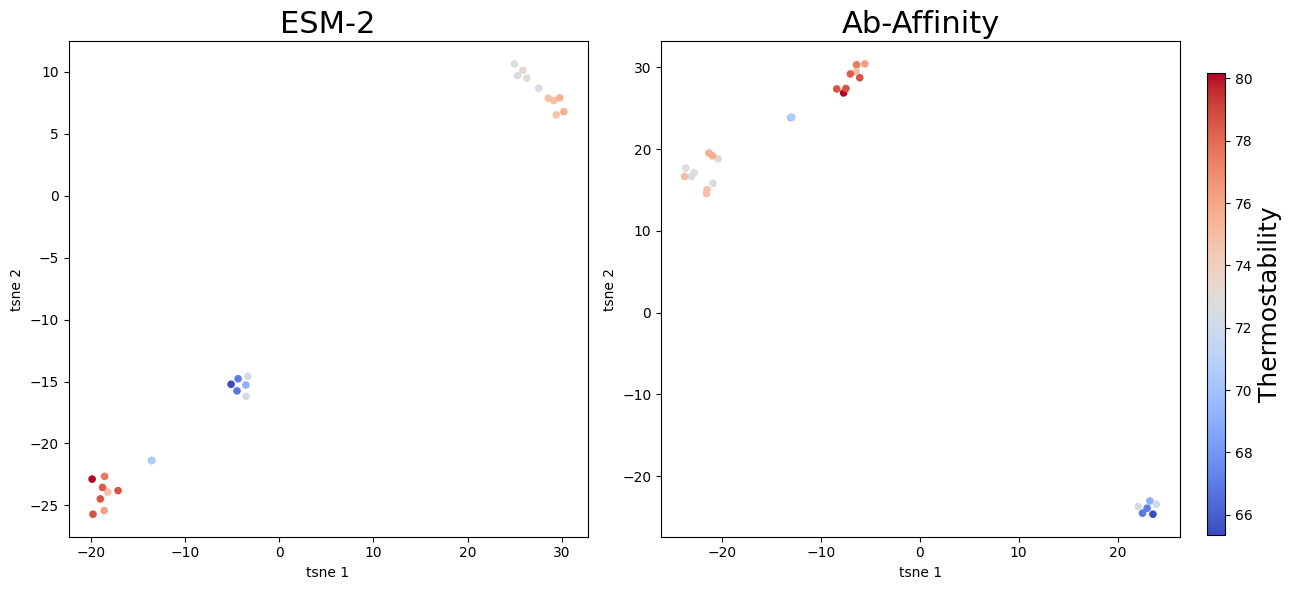

In [59]:
all_emb = np.concatenate((outputs_list1, outputs_list2), axis=0) 
from sklearn.manifold import TSNE 
tsne_model = TSNE(n_components=2, perplexity=5, random_state=123) 
tsne_result = tsne_model.fit_transform(all_emb) 


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot data on the first subplot
axes[1].scatter(tsne_result[:26, 0], tsne_result[:26, 1], s=20, c=df['fitness'].tolist(), label="Thermostability", cmap='coolwarm')
axes[1].set_title('Ab-Affinity', fontsize=22)
axes[1].set_xlabel('tsne 1')
axes[1].set_ylabel('tsne 2')

# Plot data on the second subplot
sc2 = axes[0].scatter(tsne_result[26:, 0], tsne_result[26:, 1], s=20, c=df['fitness'].tolist(), label="Thermostability", cmap='coolwarm') 
axes[0].set_title('ESM-2', fontsize=22)
axes[0].set_xlabel('tsne 1')
axes[0].set_ylabel('tsne 2')

# Adjust layout
cax = fig.add_axes([1.01, 0.1, 0.015, 0.77])  # [left, bottom, width, height]

# Add colorbar to the additional axis
cbar = fig.colorbar(sc2, cax=cax).set_label(label="Thermostability", size=18)

# Adjust layout
#plt.subplots_adjust(top=0.2)

#plt.suptitle("Antibody Embeddings and Thermostability", fontsize=18)
plt.tight_layout() 
plt.savefig('plots/thermostability_comparison.png')
plt.show()